# 1.Understand the bussiness problem
- identifying relationship between advertise spent and sales?
- Here independent variables are 3
- One is the target variable

In [25]:
# loading the dataset
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\konda\\Desktop\\programs\\Advertising.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [26]:
# data processing combining the total spends
df["Total spend"] = df["TV"]+df["radio"]+df["newspaper"]
df.head()

,TV,radio,newspaper,sales,Total spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [31]:
df.drop(columns =["TV","radio","newspaper"],inplace = True)
df

,sales,Total spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


In [32]:
# Exploratory data analysis
df.describe()

,sales,Total spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


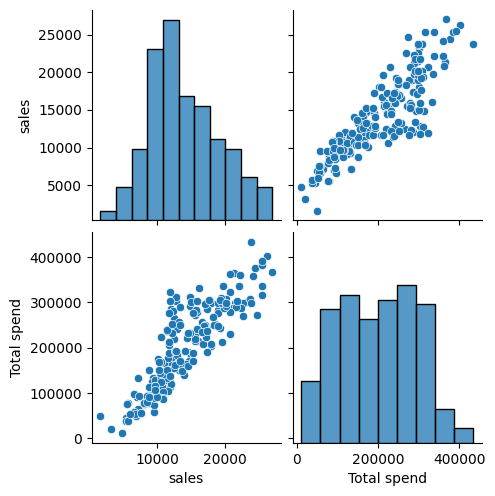

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

In [34]:
df.corr()

,sales,Total spend
sales,1.000000,0.867712
Total spend,0.867712,1.000000


In [35]:
# Data cleaning
df.isnull().sum()

sales          0
Total spend    0
dtype: int64

In [37]:
# creating x and y
X = df["Total spend"]
y = df["sales"]


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=1)


In [69]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [70]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [71]:
# modeling
from sklearn.linear_model import LinearRegression
# save the model
model = LinearRegression()
# fit the model
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

[4120.40141114]
[[0.04935295]]


In [72]:
# evaluation
ypred_test = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error
print("Test MAE",mean_absolute_error(y_test,ypred_test))

Test MAE 2044.8325420080125


In [75]:
from sklearn.metrics import mean_squared_error
print("Test MSE",mean_squared_error(y_test,ypred_test))

Test MAE 7346226.931353556


In [76]:
from sklearn.metrics import mean_squared_error
print("Test MSE",np.sqrt(mean_squared_error(y_test,ypred_test)))

Test MSE 2710.392394350596


In [77]:
# TEst R2 
print("Test R2",model.score(X_test,y_test))

Test R2 0.7046944429266434


In [ ]:
# model selection
# prediction on train data
